In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('datasets/feature_engineered_aqi_data_local.csv')

In [3]:
combined_data.head()

,date,city,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index_clear_sky,uv_index,dust,aerosol_optical_depth,us_aqi,hour_sin,hour_cos,month_sin,month_cos,day_of_week,year
0,2023-06-01 06:00:00+00:00,dhaka,51.3,34.1,369.0,17.9,8.6,44.0,0.15,0.15,1.0,1.17,152.57675,1.000000,6.123234e-17,1.224647e-16,-1.0,3,2023
1,2023-06-01 07:00:00+00:00,dhaka,50.2,32.5,381.0,19.3,10.4,53.0,0.65,0.50,1.0,1.27,151.45615,0.965926,-2.588190e-01,1.224647e-16,-1.0,3,2023
2,2023-06-01 08:00:00+00:00,dhaka,51.3,32.9,397.0,21.1,12.9,67.0,1.75,1.55,1.0,1.26,150.46272,0.866025,-5.000000e-01,1.224647e-16,-1.0,3,2023
3,2023-06-01 09:00:00+00:00,dhaka,58.4,37.8,410.0,21.4,15.5,92.0,3.25,3.20,1.0,1.27,148.54167,0.707107,-7.071068e-01,1.224647e-16,-1.0,3,2023
4,2023-06-01 10:00:00+00:00,dhaka,71.5,46.9,405.0,18.0,16.0,121.0,4.80,4.65,1.0,1.34,146.14584,0.500000,-8.660254e-01,1.224647e-16,-1.0,3,2023


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
combined_data['city_encoded'] = le.fit_transform(combined_data['city'])

In [6]:
X = combined_data[[col for col in combined_data.columns if col not in ["date", "us_aqi", "city"]]]
y = combined_data["us_aqi"]

In [7]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=43)

## XGBOOST REGRESSOR

In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [17]:
f'Coefficient of determination R^2 on train set {xgb.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.9538093452445271'

In [18]:
f'Coefficient of determination R^2 on test set {xgb.score(X_val, y_val)}'

'Coefficient of determination R^2 on test set 0.9281200546427193'

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv = 5)

In [20]:
score.mean()

np.float64(0.8668767384339506)

In [21]:
pred = xgb.predict(X_test)

C:\Users\stasn\AppData\Local\Temp\ipykernel_23676\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

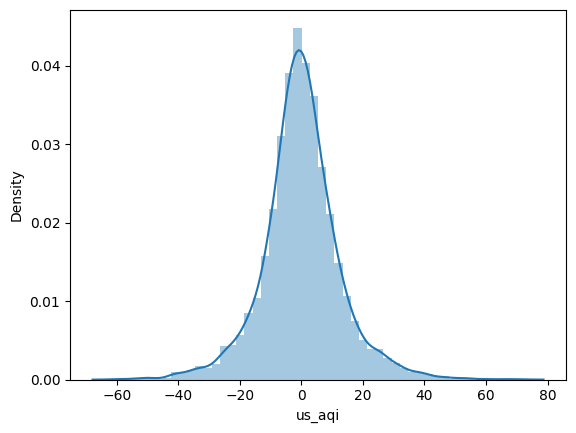

In [22]:
sns.distplot(y_test - pred)

In [23]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 9.113165656485187
Mean Sq Error: 160.79556096999104
Root Mean Error: 12.680518955074001


In [24]:
import pickle
pickle.dump(xgb, open('models/xgb.pkl', 'wb'))